In [58]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
%matplotlib inline

In [59]:
data_df = pd.read_csv("vehicle-1.csv")
data_df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           96         39.0                  58.0         117.0   
1           82         38.0                  53.0         125.0   
2           88         38.0                  58.0         137.0   
3           82         45.0                  68.0         150.0   
4           93         40.0                  73.0         139.0   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0               51.0                    6          133.0           52.0   
1               59.0                    5          133.0           51.0   
2               60.0                    5          148.0           46.0   
3               69.0                    5          148.0           45.0   
4               58.0                    6          136.0           49.0   

   axis_rectangularity  length_rectangularity  scaled_variance  \
0                 18.0                    139            154.0   
1                 18.0                    128            152.0   
2                 19.0                    131            163.0   
3                 19.0                    144            169.0   
4                 18.0                    138            166.0   

   scaled_variance_1  scaled_radius_of_gyration  scaled_radius_of_gyration_1  \
0              255.0                      150.0                         86.0   
1              259.0                      146.0                         87.0   
2              319.0                      157.0                         86.0   
3              322.0                      184.0                         80.0   
4              275.0                      137.0                         73.0   

   skewness_about  skewness_about_1  skewness_about_2  hollows_ratio class  
0             6.0               0.0             181.0            182   van  
1             0.0               0.0             177.0            183   car  
2            12.0               0.0             180.0            183   car  
3             5.0               0.0             181.0            184   bus  
4             0.0               0.0             187.0            188   van

In [60]:
# Replacing categorical variable by integer values. Then, converting string datatype into integer
data_df.replace (to_replace='car',value='0',inplace=True)
data_df.replace (to_replace='van',value='1',inplace=True)
data_df.replace (to_replace='bus',value='2',inplace=True)
data_df["class"]= data_df["class"].astype(int) 

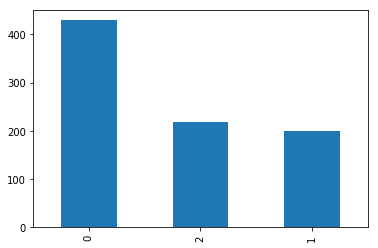

In [61]:
pd.value_counts(data_df["class"]).plot(kind="bar")

In [62]:
data_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
axis_aspect_ratio              float64
length_aspect_ratio              int64
scatter_ratio                  float64
elongatedness                  float64
axis_rectangularity            float64
length_rectangularity            int64
scaled_variance                float64
scaled_variance_1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration_1    float64
skewness_about                 float64
skewness_about_1               float64
skewness_about_2               float64
hollows_ratio                    int64
class                            int32
dtype: object

# 1. Data pre-processing - Understand the data and treat missing values

In [63]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
data_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
axis_aspect_ratio              2
length_aspect_ratio            0
scatter_ratio                  1
elongatedness                  1
axis_rectangularity            3
length_rectangularity          0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# Bare nuclei is taken as object typeeven though it has numerical values.
data_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
count         844.000000           846.000000     845.000000     845.000000   
mean           61.678910             8.567376     168.901775      40.933728   
std             7.891463             4.601217      33.214848       7.816186   
min            47.000000             2.000000     112.000000      26.000000   
25%            57.000000             7.000000     147.000000      33.000000   
50%            61.000000             8.000000     157.000000      43.000000   
75%            65.000000            10.000000     198.000000      46.000000   
max           138.000000            55.000000     265.000000      61.000000   

       axis_rectangularity  length_rectangularity  scaled_variance  \
count           843.000000             846.000000       843.000000   
mean             20.582444             147.998818       188.631079   
std               2.592933              14.515652        31.411004   
min              17.000000             118.000000       130.000000   
25%              19.000000             137.000000       167.000000   
50%              20.000000             146.000000       179.000000   
75%              23.000000             159.000000       217.000000   
max              29.000000             188.000000       320.000000   

       scaled_variance_1  scaled_radius_of_gyration  \
count         844.000000                 844.000000   
mean          439.494076                 174.709716   
std           176.666903                  32.584808   
min           184.000000                 109.000000   
25%           318.000000                 149.000000   
50%           363.500000                 173.500000   
75%           587.000000                 198.000000   
max          1018.000000                 268.000000   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about_2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    0.750591  
std            6.155809       7.438797    0.838691  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    0.000000  
75%          193.000000     201.000000    2.000000  
max          206.000000     211.000000    2.000000

In [8]:
# All missing values are replaced by mean values of corresponding columnss
data_df.fillna(data_df.mean(),inplace=True)

In [9]:
# Below command shows there are no missing values after they are being replaced by corresponding Median values of columns
data_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
axis_aspect_ratio              0
length_aspect_ratio            0
scatter_ratio                  0
elongatedness                  0
axis_rectangularity            0
length_rectangularity          0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

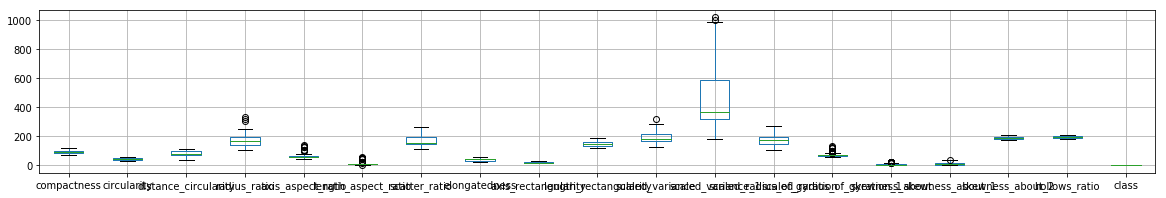

In [10]:
data_df.boxplot(figsize=(20,3))

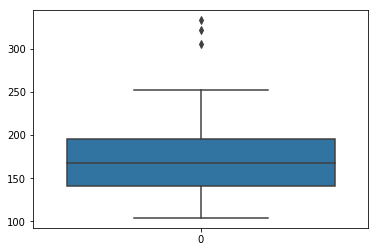

In [11]:
# 3 outliers in radius_ratio
sns.boxplot(data=data_df.radius_ratio)

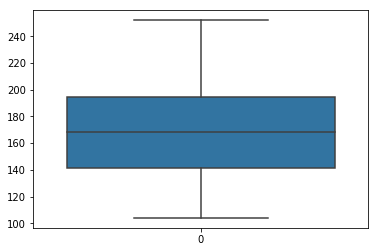

In [12]:
data_df["radius_ratio"] = data_df["radius_ratio"].mask(data_df["radius_ratio"] > 255, data_df['radius_ratio'].median())
# 3 outliers removed
sns.boxplot(data=data_df.radius_ratio)

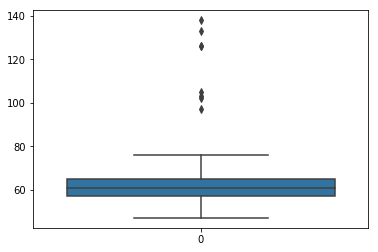

In [13]:
# 8 outliers found in axis_aspect_ratio
sns.boxplot(data=data_df.axis_aspect_ratio)

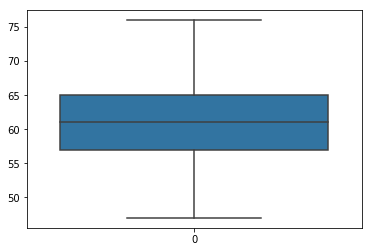

In [14]:
data_df["axis_aspect_ratio"] = data_df["axis_aspect_ratio"].mask(data_df["axis_aspect_ratio"] > 95, data_df['axis_aspect_ratio'].median())
# 8 outliers fixed in axis_aspect_ratio
sns.boxplot(data=data_df.axis_aspect_ratio)

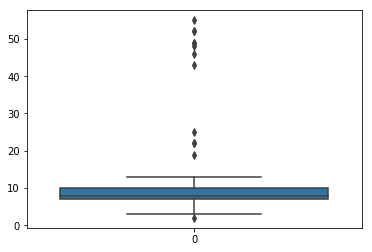

In [15]:
# Approx 12-15 outliers fixed exxcept value which is 97. This can be replaced by 2SD value because it is close to tail
sns.boxplot(data=data_df.length_aspect_ratio)

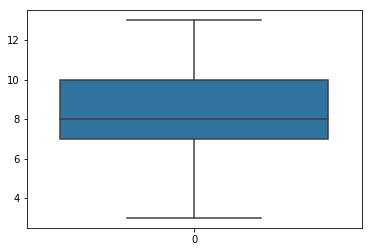

In [16]:
data_df["length_aspect_ratio"] = data_df["length_aspect_ratio"].mask(data_df["length_aspect_ratio"] > 18, data_df['length_aspect_ratio'].median())
data_df["length_aspect_ratio"] = data_df["length_aspect_ratio"].mask(data_df["length_aspect_ratio"] <3, data_df['length_aspect_ratio'].median())
sns.boxplot(data=data_df.length_aspect_ratio)
# All outliers are fixed

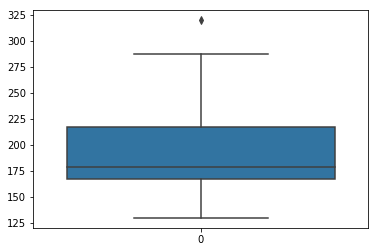

In [17]:
# 1 outlier found
sns.boxplot(data=data_df.scaled_variance)

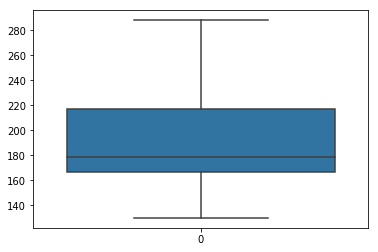

In [18]:
data_df["scaled_variance"] = data_df["scaled_variance"].mask(data_df["scaled_variance"] >300, data_df['scaled_variance'].median())
# 1 outlier fixed
sns.boxplot(data=data_df.scaled_variance)

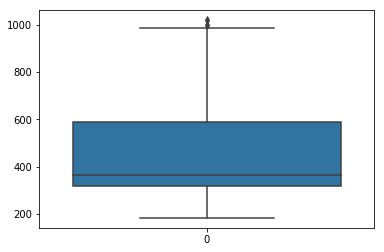

In [19]:
# 2 outliers found
sns.boxplot(data=data_df.scaled_variance_1)

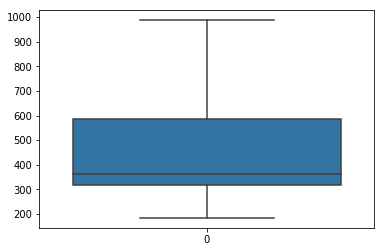

In [20]:
data_df["scaled_variance_1"] = data_df["scaled_variance_1"].mask(data_df["scaled_variance_1"] >987, data_df['scaled_variance_1'].median())
# 2 outliers fixed
sns.boxplot(data=data_df.scaled_variance_1)

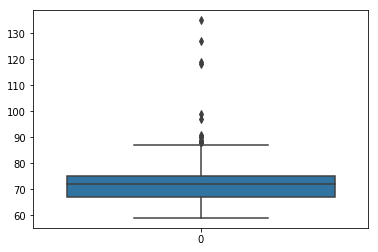

In [21]:
# 9 outliers found
sns.boxplot(data=data_df.scaled_radius_of_gyration_1)

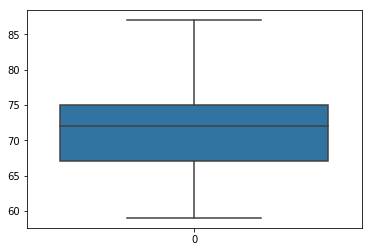

In [22]:
data_df["scaled_radius_of_gyration_1"] = data_df["scaled_radius_of_gyration_1"].mask(data_df["scaled_radius_of_gyration_1"] >87, data_df['scaled_radius_of_gyration_1'].median())
# 9 outliers fixed
sns.boxplot(data=data_df.scaled_radius_of_gyration_1)

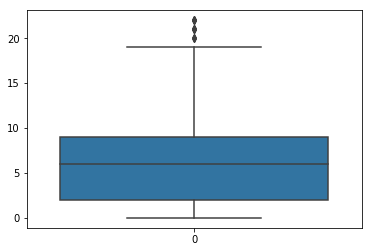

In [23]:
sns.boxplot(data=data_df.skewness_about)

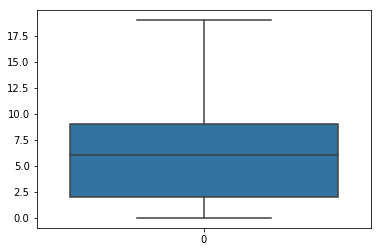

In [24]:
data_df["skewness_about"] = data_df["skewness_about"].mask(data_df["skewness_about"] >=20, data_df['skewness_about'].median())
data_df["skewness_about_1"] = data_df["skewness_about_1"].mask(data_df["skewness_about_1"] >40, data_df['skewness_about_1'].median())
sns.boxplot(data=data_df.skewness_about)
# Outliers removed

# 2. Understanding attributes/relationships between them, Remove irrelevent attributes

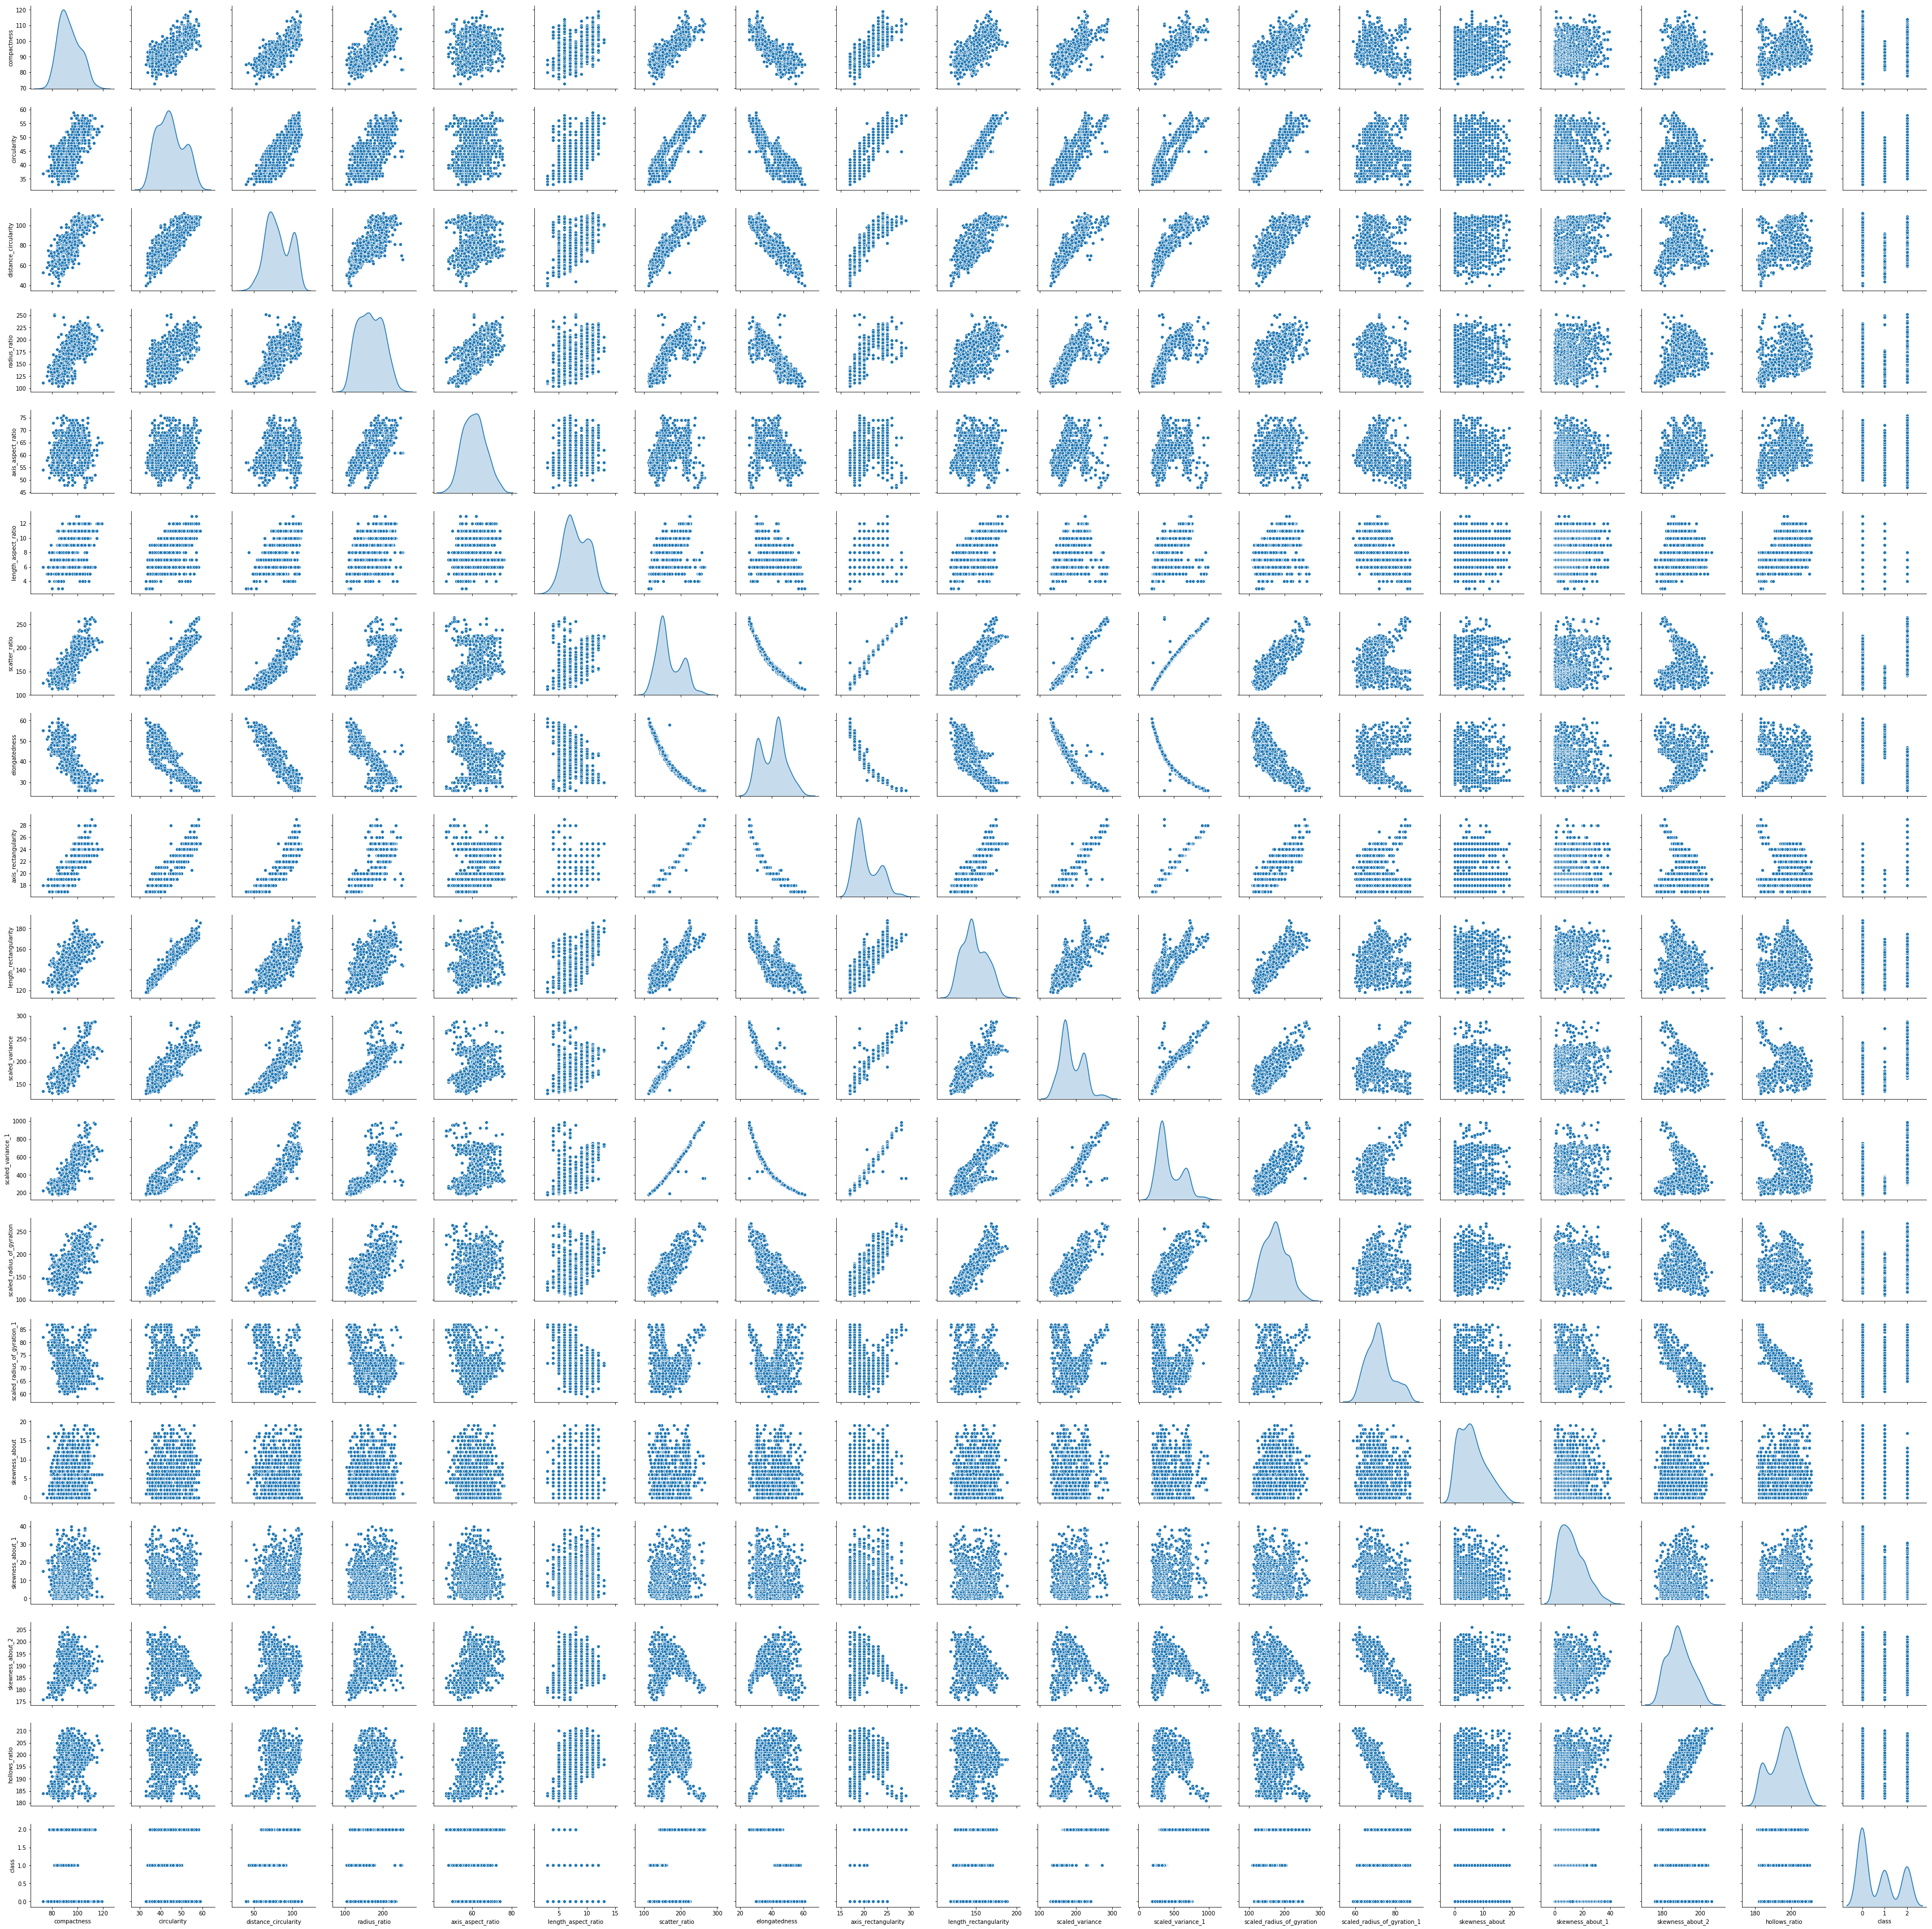

In [25]:
# Pairplot after fixing missing values.
sns.pairplot(data_df,diag_kind='kde')

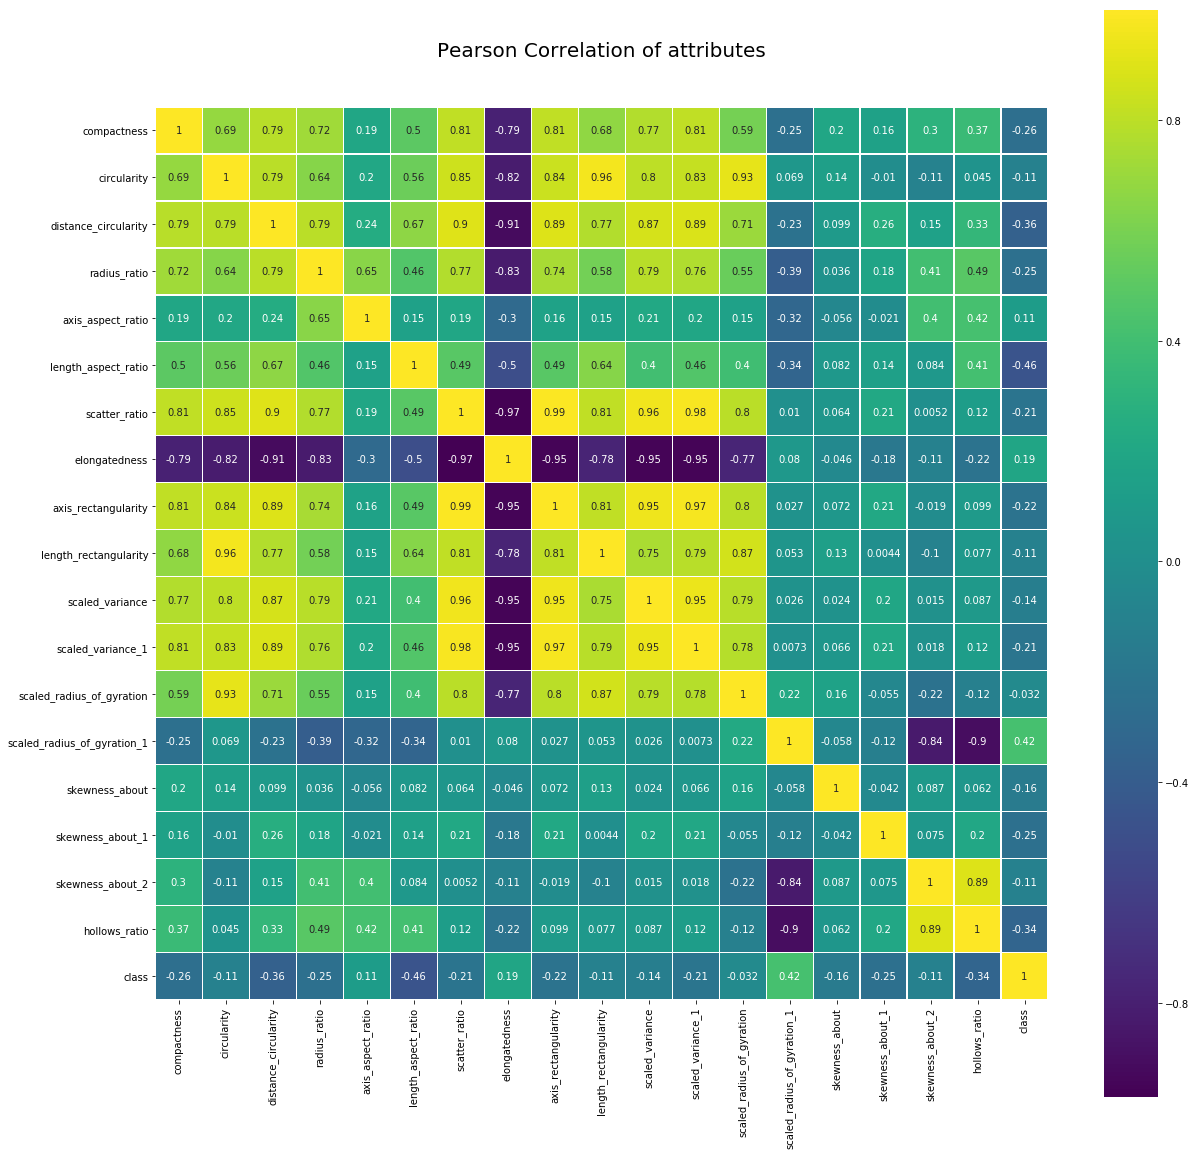

In [26]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of attributes', y=1.05, size=20)
sns.heatmap(data_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [27]:
## Following independent attributes show direct linear relationship hence one of them can be dropped to make model simpler and lighter
# 1) skewness_about_2 - hollows_ratio
# 2) scaled_variance - scaled_variance_1
# 3) scaled_variance_1 - axis_rectangularity
# 4) scaled_variance_1 - scatter_ratio
# 5) scaled_variance - scatter_ratio
# 6) scaled_variance - axis_rectangularity
# 7) length_rectangularity - circularity
# 8) axis_rectangularity - scatter_ratio
# 9) scatter_ratio - distance_circularity
#10) circularity - length_rectangularity
#11) circularity - scaled_radius_of_gyration

In [28]:
# Dropping following columns as they have linear relationship with couple of other columns.Hence it doesn't make sense
# to keep these columns which will give redundant behaviour as far as relationship is concerned
   # scaled_variance_1
   # axis_rectangularity
data_df = data_df.drop(['scaled_variance_1'], axis =1)
data_df = data_df.drop(['axis_rectangularity'], axis =1)
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           96         39.0                  58.0         117.0   
1           82         38.0                  53.0         125.0   
2           88         38.0                  58.0         137.0   
3           82         45.0                  68.0         150.0   
4           93         40.0                  73.0         139.0   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0               51.0                    6          133.0           52.0   
1               59.0                    5          133.0           51.0   
2               60.0                    5          148.0           46.0   
3               69.0                    5          148.0           45.0   
4               58.0                    6          136.0           49.0   

   length_rectangularity  scaled_variance  scaled_radius_of_gyration  \
0                    139            154.0                      150.0   
1                    128            152.0                      146.0   
2                    131            163.0                      157.0   
3                    144            169.0                      184.0   
4                    138            166.0                      137.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         86.0             6.0               0.0   
1                         87.0             0.0               0.0   
2                         86.0            12.0               0.0   
3                         80.0             5.0               0.0   
4                         73.0             0.0               0.0   

   skewness_about_2  hollows_ratio  class  
0             181.0            182      1  
1             177.0            183      0  
2             180.0            183      0  
3             181.0            184      2  
4             187.0            188      1

In [29]:
# Let us now remove duplicate/irrelevant columns
#cars_new = data_df.drop(['class'], axis =1)
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           96         39.0                  58.0         117.0   
1           82         38.0                  53.0         125.0   
2           88         38.0                  58.0         137.0   
3           82         45.0                  68.0         150.0   
4           93         40.0                  73.0         139.0   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0               51.0                    6          133.0           52.0   
1               59.0                    5          133.0           51.0   
2               60.0                    5          148.0           46.0   
3               69.0                    5          148.0           45.0   
4               58.0                    6          136.0           49.0   

   length_rectangularity  scaled_variance  scaled_radius_of_gyration  \
0                    139            154.0                      150.0   
1                    128            152.0                      146.0   
2                    131            163.0                      157.0   
3                    144            169.0                      184.0   
4                    138            166.0                      137.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         86.0             6.0               0.0   
1                         87.0             0.0               0.0   
2                         86.0            12.0               0.0   
3                         80.0             5.0               0.0   
4                         73.0             0.0               0.0   

   skewness_about_2  hollows_ratio  class  
0             181.0            182      1  
1             177.0            183      0  
2             180.0            183      0  
3             181.0            184      2  
4             187.0            188      1

In [30]:
# No duplicate rows
print('Number of rows before discarding duplicates = %d' % (data_df.shape[0]))
data_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (data_df.shape[0]))

Number of rows before discarding duplicates = 846
Number of rows after discarding duplicates = 846


# 3 Use ZScore to bring all columns at same scale

In [31]:
from scipy.stats import zscore

data_df.dtypes
numeric_cols = data_df.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
data_df[numeric_cols] =data_df[numeric_cols].apply(zscore)
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.282093    -0.950811             -1.532613     -1.598197   
1    -1.419082    -1.113935             -1.850445     -1.349198   
2    -0.690007    -1.113935             -1.532613     -0.975700   
3    -1.419082     0.027931             -0.896950     -0.571076   
4    -0.082445    -0.787688             -0.579118     -0.913450   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0          -1.810357            -1.026812      -1.082175       1.417491   
1          -0.384381            -1.511567      -1.082175       1.289400   
2          -0.206134            -1.511567      -0.630035       0.648945   
3           1.398089            -1.511567      -0.630035       0.520853   
4          -0.562628            -1.026812      -0.991747       1.033218   

   length_rectangularity  scaled_variance  scaled_radius_of_gyration  \
0              -0.620306        -1.111369                  -0.759668   
1              -1.378557        -1.175862                  -0.882643   
2              -1.171761        -0.821147                  -0.544462   
3              -0.275646        -0.627666                   0.285618   
4              -0.689238        -0.724406                  -1.159336   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                     2.281550       -0.032895          -1.41646   
1                     2.444021       -1.345729          -1.41646   
2                     2.281550        1.279939          -1.41646   
3                     1.306723       -0.251700          -1.41646   
4                     0.169425       -1.345729          -1.41646   

   skewness_about_2  hollows_ratio  class  
0         -1.288036      -1.833690      1  
1         -1.938598      -1.699181      0  
2         -1.450677      -1.699181      0  
3         -1.288036      -1.564671      2  
4         -0.312193      -1.026631      1

# 3.1 Use SVM to classify class (y) of vehicles without PCA

In [32]:
# independant variables
X = data_df.drop(['class'], axis=1)
# the dependent variable
y = data_df[['class']]

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

# calculate accuracy measures and confusion matrix
from sklearn import metrics
clf = svm.SVC(gamma=0.025, C=3)   

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)

C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print("Accuracy on training set: {:.2f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, Y_test)))

print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy on training set: 0.97
Accuracy on test set: 0.95
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       127
           1       0.88      0.98      0.93        59
           2       0.98      0.94      0.96        68

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254

[[119   7   1]
 [  1  58   0]
 [  3   1  64]]


# 4. Reduce Dimensions using PCA

In [35]:
data_df.head(2)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.282093    -0.950811             -1.532613     -1.598197   
1    -1.419082    -1.113935             -1.850445     -1.349198   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0          -1.810357            -1.026812      -1.082175       1.417491   
1          -0.384381            -1.511567      -1.082175       1.289400   

   length_rectangularity  scaled_variance  scaled_radius_of_gyration  \
0              -0.620306        -1.111369                  -0.759668   
1              -1.378557        -1.175862                  -0.882643   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                     2.281550       -0.032895          -1.41646   
1                     2.444021       -1.345729          -1.41646   

   skewness_about_2  hollows_ratio  class  
0         -1.288036      -1.833690      1  
1         -1.938598      -1.699181      0

# 4.1 Dimensionality Reduction

In [36]:
covMatrix = np.cov(X,rowvar=False)
pca = PCA(n_components=16)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Eigen values and vectors

In [37]:
print(pca.explained_variance_)  # Eigen values
print(pca.components_)  # Eigen vectors

[7.9610915  3.2971956  1.16235717 1.1324819  0.86412322 0.64401651
 0.31147224 0.22698029 0.1256287  0.07591782 0.07015153 0.04893917
 0.03573202 0.02910286 0.0192076  0.01453677]
[[-0.30199681 -0.31716429 -0.33535596 -0.30497815 -0.12193548 -0.22674702
  -0.33586014  0.33802711 -0.30794368 -0.32477193 -0.28704165  0.06679121
  -0.04372246 -0.06237779 -0.05920293 -0.11364369]
 [-0.06277284  0.16627454 -0.01667529 -0.17259812 -0.2456134  -0.08262172
   0.10275898 -0.04136407  0.15569483  0.10377642  0.24227343  0.50197023
  -0.00852285 -0.0944336  -0.50264909 -0.50159155]
 [ 0.05379911  0.15277963 -0.07884715 -0.10180846 -0.02914697  0.1201726
  -0.12398578  0.11669652  0.16937415 -0.16684216  0.15602044 -0.09449396
   0.64917444 -0.62480859  0.09036109  0.05591871]
 [ 0.13255119 -0.05262344  0.1247059  -0.24169192 -0.61343983  0.27475841
   0.02448305  0.04803087  0.02621766 -0.04060789 -0.10233216 -0.10322463
   0.38599462  0.51830635 -0.04470744  0.08883572]
 [ 0.13379307 -0.12026062

The percentage of variation explained by each eigen Vector

In [38]:
print(pca.explained_variance_ratio_)

[0.49698008 0.20583114 0.07256145 0.07069645 0.05394386 0.04020345
 0.019444   0.0141695  0.00784251 0.00473926 0.00437929 0.00305508
 0.00223061 0.00181678 0.00119906 0.00090747]


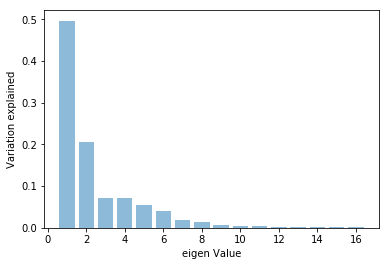

In [39]:
plt.bar(list(range(1,17)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

# Its very clear that 6 dimensions explain maximum variation (95%) and hence we can proceed with 6 dimensions for modelling

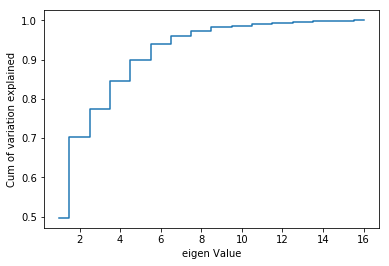

In [40]:
plt.step(list(range(1,17)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [41]:
print(pca.explained_variance_)
print(pca.components_)

[7.9610915  3.2971956  1.16235717 1.1324819  0.86412322 0.64401651
 0.31147224 0.22698029 0.1256287  0.07591782 0.07015153 0.04893917
 0.03573202 0.02910286 0.0192076  0.01453677]
[[-0.30199681 -0.31716429 -0.33535596 -0.30497815 -0.12193548 -0.22674702
  -0.33586014  0.33802711 -0.30794368 -0.32477193 -0.28704165  0.06679121
  -0.04372246 -0.06237779 -0.05920293 -0.11364369]
 [-0.06277284  0.16627454 -0.01667529 -0.17259812 -0.2456134  -0.08262172
   0.10275898 -0.04136407  0.15569483  0.10377642  0.24227343  0.50197023
  -0.00852285 -0.0944336  -0.50264909 -0.50159155]
 [ 0.05379911  0.15277963 -0.07884715 -0.10180846 -0.02914697  0.1201726
  -0.12398578  0.11669652  0.16937415 -0.16684216  0.15602044 -0.09449396
   0.64917444 -0.62480859  0.09036109  0.05591871]
 [ 0.13255119 -0.05262344  0.1247059  -0.24169192 -0.61343983  0.27475841
   0.02448305  0.04803087  0.02621766 -0.04060789 -0.10233216 -0.10322463
   0.38599462  0.51830635 -0.04470744  0.08883572]
 [ 0.13379307 -0.12026062

In [42]:
print(pca.explained_variance_ratio_)

[0.49698008 0.20583114 0.07256145 0.07069645 0.05394386 0.04020345
 0.019444   0.0141695  0.00784251 0.00473926 0.00437929 0.00305508
 0.00223061 0.00181678 0.00119906 0.00090747]


# 4.2 - 6 dimensions seems very reasonable. With these 6 dimensions we can explain over 95% of the variation in the original data!

In [43]:
pca3 = PCA(n_components=6)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[-0.30199681 -0.31716429 -0.33535596 -0.30497815 -0.12193548 -0.22674702
  -0.33586014  0.33802711 -0.30794368 -0.32477193 -0.28704165  0.06679121
  -0.04372246 -0.06237779 -0.05920293 -0.11364369]
 [-0.06277284  0.16627454 -0.01667529 -0.17259812 -0.2456134  -0.08262172
   0.10275898 -0.04136407  0.15569483  0.10377642  0.24227343  0.50197023
  -0.00852285 -0.0944336  -0.50264909 -0.50159155]
 [ 0.05379911  0.15277963 -0.07884715 -0.10180846 -0.02914697  0.1201726
  -0.12398578  0.11669652  0.16937415 -0.16684216  0.15602044 -0.09449396
   0.64917444 -0.62480859  0.09036109  0.05591871]
 [ 0.13255119 -0.05262344  0.1247059  -0.24169192 -0.61343983  0.27475841
   0.02448305  0.04803087  0.02621766 -0.04060789 -0.10233216 -0.10322463
   0.38599462  0.51830635 -0.04470744  0.08883572]
 [ 0.13379307 -0.12026062 -0.04887987  0.16482933  0.15970833 -0.61358234
   0.10997649 -0.10337522 -0.23529615  0.17599878  0.01404143  0.16337907
   0.55110265  0.24518728  0.14427443 -0.12422469]
 [ 0.3

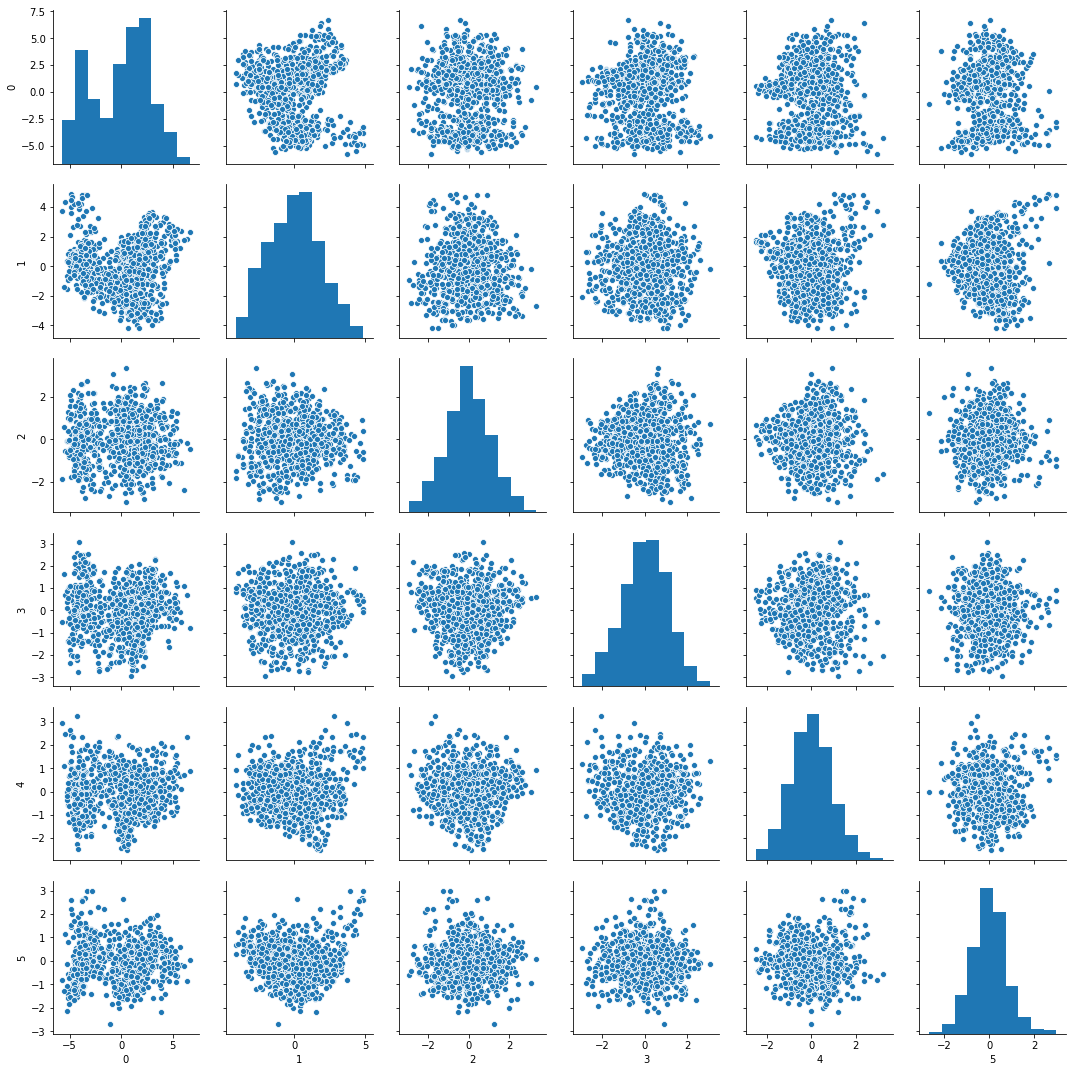

In [44]:
sns.pairplot(pd.DataFrame(Xpca3))
# After dimension reduction, we have total 6 attributes 

In [45]:
# Use SVM to classify class (y) of vehicles with PCA
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

# calculate accuracy measures and confusion matrix
from sklearn import metrics
clf = svm.SVC(gamma=0.025, C=3)   

X_train, X_test, Y_train, Y_test = train_test_split(Xpca3, y, test_size=0.3, random_state=2)

# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)

C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print("Accuracy on training set: {:.2f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, Y_test)))

print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy on training set: 0.92
Accuracy on test set: 0.90
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       127
           1       0.79      0.95      0.86        59
           2       0.93      0.93      0.93        68

    accuracy                           0.90       254
   macro avg       0.89      0.91      0.90       254
weighted avg       0.91      0.90      0.90       254

[[109  14   4]
 [  2  56   1]
 [  4   1  63]]


# 4.3- SVM with/without PCA Analysis -

Accuracy of Train/Test data without PCA + SVM is 98% and 95% respectively. However, Accuracy of Train/Test with PCA + SVM technique is 91% and 90% respectively.

It is very clear that without PCA, we end up getting noise and fitting noise data which increases the training accuracy but test accuracy relatively reduces. As a result, Training model get overfitted because of fitting noise data. Same noise doesn't come in production and hence test accuracy reduces.

However, with PCA there is less chances of overfitting and in turn its reduces the accuracy % but also reduces noise level and overfitting of data in the model

# 5- Grid Search (Optional)

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.05,0.5,1]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# 5.1 Cross Validation (Optional)
As the value of C increase from 0.01 through 1 then accuracy increases accordingly

In [48]:
# scikit-learn k-fold cross-validation
from sklearn.model_selection import cross_val_score
# prepare cross validation
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.05)


C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was 

# 6 Kmeans Clustering Technique (Optional)

In [49]:
# Variables are mow scaled. Let us now try to create clusters
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(X)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

num_clusters  cluster_errors
0              1    13536.000000
1              2     8427.502073
2              3     6603.391811
3              4     5991.671011
4              5     5447.426979
5              6     5003.497835
6              7     4765.952416
7              8     4520.991300
8              9     4326.774111
9             10     4155.871792
10            11     3977.649746
11            12     3802.580186
12            13     3662.527958
13            14     3556.773549

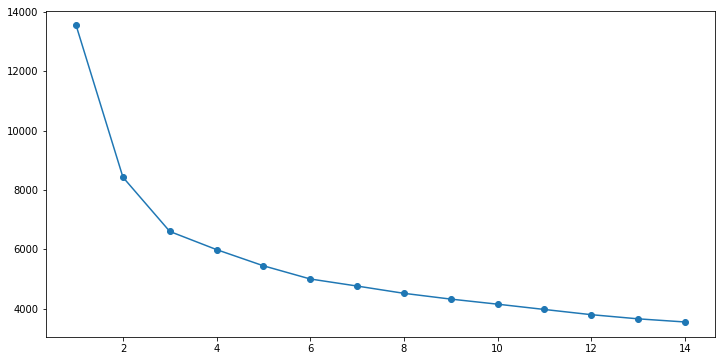

In [50]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [51]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [52]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[197 224 246 179]


In [53]:
# Distribution looks fine.
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X) )
centroid_df.transpose()

0         1         2         3
compactness                 -1.016919 -0.192565  1.216652 -0.311893
circularity                 -0.681982  0.014823  1.243724 -0.977239
distance_circularity        -1.054988 -0.010111  1.266660 -0.567044
radius_ratio                -1.219959  0.123629  1.024600 -0.220182
axis_aspect_ratio           -0.805116  0.432594  0.170416  0.110528
length_aspect_ratio         -0.785664  0.137468  0.772303 -0.368735
scatter_ratio               -0.858645 -0.187449  1.359626 -0.688973
elongatedness                0.989004  0.018744 -1.251595  0.608156
length_rectangularity       -0.707083  0.041010  1.179490 -0.894108
scaled_variance             -0.884331 -0.094063  1.268427 -0.652233
scaled_radius_of_gyration   -0.507723  0.018120  1.154565 -1.050617
scaled_radius_of_gyration_1  1.103754 -0.186381 -0.020785 -0.952944
skewness_about              -0.040566  0.029712  0.164564 -0.218696
skewness_about_1            -0.248130 -0.268694  0.290555  0.210015
skewness_about_2            -1.137779  0.156125 -0.049720  1.125149
hollows_ratio               -1.285409  0.193565  0.168647  0.940669

In [54]:
# Add cluster number to original cars data

predictions = kmeans.predict(X)
predictions
data_df["group"] = predictions
data_df['group'] = data_df['group'].astype('category')
data_df.dtypes

compactness                     float64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
axis_aspect_ratio               float64
length_aspect_ratio             float64
scatter_ratio                   float64
elongatedness                   float64
length_rectangularity           float64
scaled_variance                 float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration_1     float64
skewness_about                  float64
skewness_about_1                float64
skewness_about_2                float64
hollows_ratio                   float64
class                             int32
group                          category
dtype: object

In [55]:
data_df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.282093    -0.950811             -1.532613     -1.598197   
1    -1.419082    -1.113935             -1.850445     -1.349198   
2    -0.690007    -1.113935             -1.532613     -0.975700   
3    -1.419082     0.027931             -0.896950     -0.571076   
4    -0.082445    -0.787688             -0.579118     -0.913450   

   axis_aspect_ratio  length_aspect_ratio  scatter_ratio  elongatedness  \
0          -1.810357            -1.026812      -1.082175       1.417491   
1          -0.384381            -1.511567      -1.082175       1.289400   
2          -0.206134            -1.511567      -0.630035       0.648945   
3           1.398089            -1.511567      -0.630035       0.520853   
4          -0.562628            -1.026812      -0.991747       1.033218   

   length_rectangularity  scaled_variance  scaled_radius_of_gyration  \
0              -0.620306        -1.111369                  -0.759668   
1              -1.378557        -1.175862                  -0.882643   
2              -1.171761        -0.821147                  -0.544462   
3              -0.275646        -0.627666                   0.285618   
4              -0.689238        -0.724406                  -1.159336   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                     2.281550       -0.032895          -1.41646   
1                     2.444021       -1.345729          -1.41646   
2                     2.281550        1.279939          -1.41646   
3                     1.306723       -0.251700          -1.41646   
4                     0.169425       -1.345729          -1.41646   

   skewness_about_2  hollows_ratio  class group  
0         -1.288036      -1.833690      1     0  
1         -1.938598      -1.699181      0     0  
2         -1.450677      -1.699181      0     0  
3         -1.288036      -1.564671      2     0  
4         -0.312193      -1.026631      1     0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F60F8EFF98>,
      dtype=object)

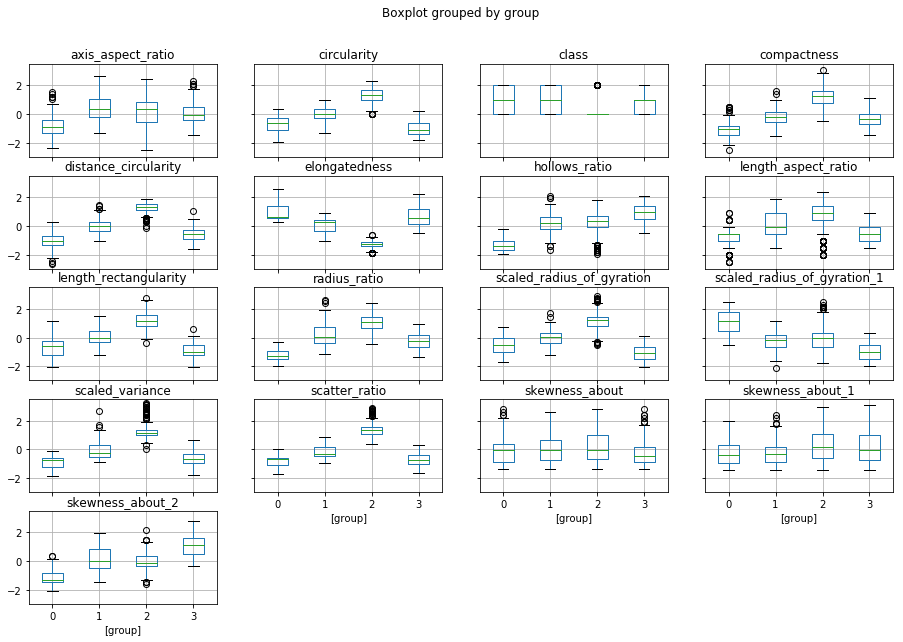

In [56]:
# Visualize the centers
data_df["group"] = predictions
data_df.boxplot(by = 'group',  layout=(5,4), figsize=(15, 10))

In [57]:
#Group 0 - Characterised by lower axis aspect ratio, lower compactness,lower skewness and radius ratio
# Group 1 - Characterised by relatively higher axis aspect ratio, lower compactness,lower skewness and radius ratio then Group 1
# Group 2 - They are highly compact,higher scatter ratio, high variance but least radius ratio, average skewness
# Group 3 - Highly skew,medium scatter ratio,average compactness and radius ratio.Least circularity among all groups